# Statistics for a Corpus of G06 Documents

Here we can take a look at some of the properties of our data.  

We will look at a number of samples and see the vocabulary and characters used.

In [1]:
from patentdata.corpus import USPublications
from patentdata.models.patentcorpus import LazyPatentCorpus
from collections import Counter
import os
import pickle
import random
import logging

%matplotlib inline

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

#import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)

In [2]:
# See if we have a saved copy of our data - if not create it (takes a while)
filename = "first100kg06.pkl"

if os.path.isfile(filename):
    with open(filename, "rb") as f:
        print("Loading data")
        stats = pickle.load(f)
        print("Stats loaded")
else:
    PIK = "G06records.data"

    path = '/media/SAMSUNG1/Patent_Downloads'
    ds = USPublications(path)
    
    if os.path.isfile(PIK):
        with open(PIK, "rb") as f:
            print("Loading data")
            records = pickle.load(f)
            print("{0} records loaded".format(len(records)))
    else:
        records = ds.get_records(["G", "06"])
        
    with open(PIK, "wb") as f:
        pickle.dump(records, f)
    # Get data from 100000 random descriptions across the data
    records_random_sample = random.sample(records, 100000)
    print("Random sample of {0} records".format(len(records_random_sample)))
    
    lzy = LazyPatentCorpus()
    lzy.init_by_filenames(ds, records_random_sample)
    stats = lzy.get_statistics()
    with open(filename, "wb") as f:
        pickle.dump(stats, f)

Loading data
Stats loaded


```
Unfiltered vocabulary = 2920687
Filtered vocabulary = 1024235
Character vocabulary = 607
Total Number of Paragraphs = 10550134
Total Number of Sentences = 37785752
```

In [3]:
unfiltered_vocabulary = len(stats[0])
filtered_vocabulary = len(stats[1])
character_vocabulary = len(stats[2])
total_characters = sum(stats[2].values())
total_paragraphs = sum([k*i for k, i in stats[3].items()])
total_sentences = sum([k*i for k, i in stats[4].items()])
print_string = """
            Unfiltered vocabulary = {0}
            Filtered vocabulary = {1}
            Character vocabulary = {2}
            Total number of characters = {3}
            Total Number of Paragraphs = {4}
            Total Number of Sentences = {5}
        """.format(
            unfiltered_vocabulary, filtered_vocabulary, character_vocabulary,
            total_characters,
            total_paragraphs, total_sentences
        )
print(print_string)


            Unfiltered vocabulary = 2920687
            Filtered vocabulary = 1024235
            Character vocabulary = 607
            Total number of characters = 6082397860
            Total Number of Paragraphs = 10550134
            Total Number of Sentences = 37785752
        


---
## Filtered Word Tokens

In [4]:
# Have a look at the filtered counter
stats[1]

Counter({'saliency_peak_min': 1,
         'δsathc': 12,
         'curs_activity_param': 3,
         '16779': 1,
         'sunit': 1,
         'pingback': 19,
         'conic': 2211,
         '3121': 500,
         '7219429': 1,
         'leyland': 2,
         'thread_run': 21,
         'neu5acb2': 4,
         'locale_slongd': 1,
         '755964': 1,
         'matherson': 1,
         'facilty': 2,
         'stripparam': 6,
         '1521p99hpp_av06': 1,
         'a6a22bf1a12bf2': 1,
         'xfree': 10,
         'rcloud': 19,
         'fedlab': 1,
         'binomi': 1107,
         '05cc01c01': 1,
         'ifc1': 1,
         '45812': 2,
         'nitd': 1,
         '54e3': 1,
         'chal3': 1,
         'soloh': 2,
         'choral': 4,
         'undoubtly': 1,
         'picturetel': 5,
         'crevel': 2,
         'cdec_1': 1,
         'nrsrv': 1,
         'agem': 6,
         '693171805': 4,
         'limit_po': 1,
         'thymu2010816': 1,
         '17466': 1,
         '0135470

In [5]:
stats[1].most_common(100)

[('the', 83224153),
 ('e', 57915010),
 (',', 52147953),
 ('_CAPITAL_', 52099908),
 ('s', 46590918),
 ('.', 46177889),
 ('a', 36089751),
 ('of', 33955030),
 ('ed', 29758892),
 ('ing', 26411163),
 ('to', 25863314),
 ('and', 21302655),
 ('in', 20079115),
 ('_ALL_CAPITAL_', 18469717),
 ('es', 16812667),
 ('is', 15322064),
 ('ion', 13968938),
 ('ation', 13501958),
 ('for', 11056005),
 ('or', 10954847),
 ('be', 10798277),
 ('-', 10272909),
 (')', 9806508),
 ('(', 9607377),
 ('er', 9171662),
 ('an', 8281370),
 ('may', 8055830),
 ('al', 7692688),
 ('as', 7588665),
 ('data', 7475513),
 ('that', 7390165),
 ('by', 6398288),
 ('with', 6191571),
 ('d', 6128697),
 ('system', 5328069),
 ('one', 5162575),
 ('on', 5159250),
 ('devic', 4907137),
 ('user', 4819528),
 ('are', 4798501),
 ('ated', 4668114),
 ('fig', 4637390),
 ('from', 4618302),
 ('inform', 4527646),
 ('process', 4183872),
 ('at', 4077582),
 ('includ', 4061839),
 ('embodi', 4047962),
 ('can', 4039854),
 ('comput', 3618928),
 ('exampl', 3553

In [6]:
total_filtered = sum(stats[1].values())
print("{0} filtered tokens were counted in our set of 100k G06 patent publications".format(total_filtered))

1508660975 filtered tokens were counted in our set of 100k G06 patent publications


In [7]:
top = dict()
for i in [50, 100, 250, 500, 1000, 2000, 3000, 4000, 5000, 10000, 50000, 100000]:
    top[i] = sum([c for _, c in stats[1].most_common(i)])/total_filtered
    print("The top {0} of filtered tokens make up {1}%".format(i, int(top[i]*100)))

The top 50 of filtered tokens make up 54%
The top 100 of filtered tokens make up 62%
The top 250 of filtered tokens make up 74%
The top 500 of filtered tokens make up 82%
The top 1000 of filtered tokens make up 89%
The top 2000 of filtered tokens make up 94%
The top 3000 of filtered tokens make up 96%
The top 4000 of filtered tokens make up 97%
The top 5000 of filtered tokens make up 97%
The top 10000 of filtered tokens make up 98%
The top 50000 of filtered tokens make up 99%
The top 100000 of filtered tokens make up 99%


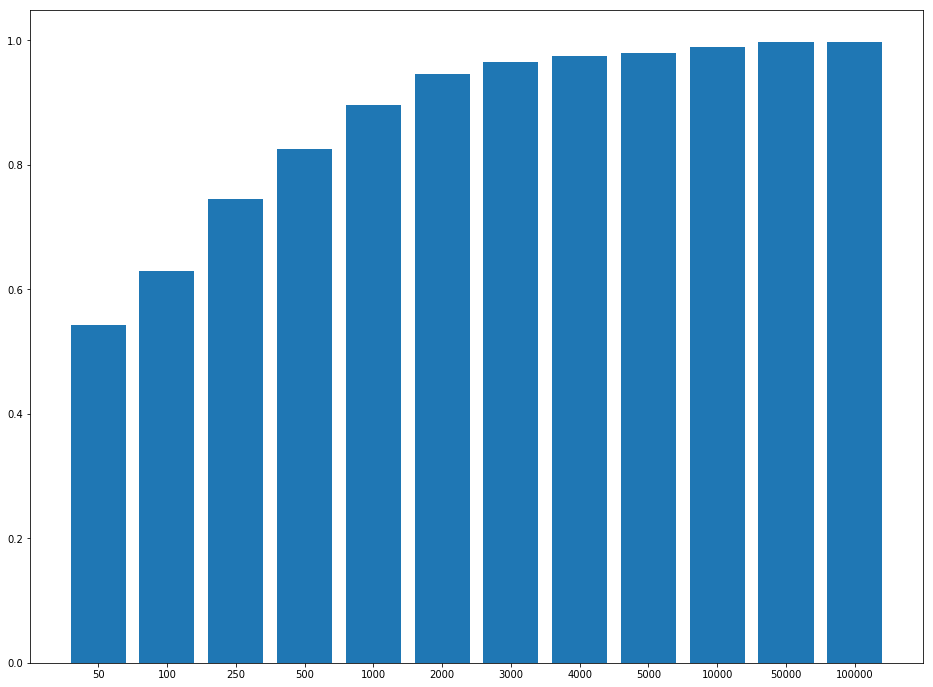

In [8]:
# Plot bar chart with non-true-to-scale x axis
plt.bar(range(len(top)), sorted(list(top.values())))
plt.xticks(range(len(top)), sorted(list(top.keys())))
plt.show()

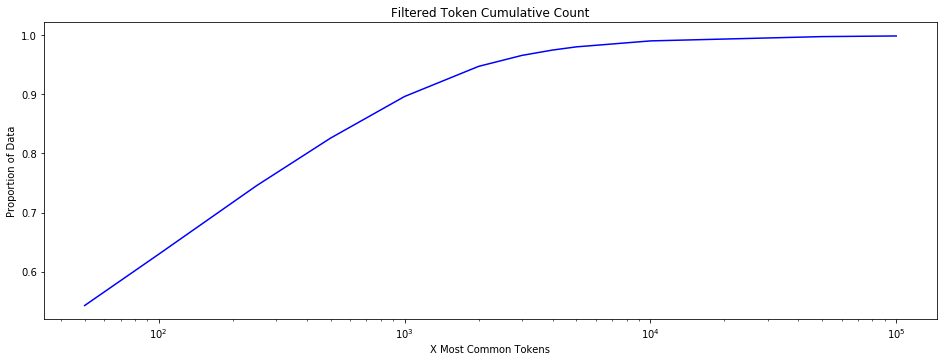

In [9]:
# Plotting properly on log scale
fig = plt.figure()
ax = fig.add_subplot(2,1,1)

line, = ax.plot(sorted(list(top.keys())), sorted(list(top.values())), color='blue')
ax.set_xscale('log')

ax.set_title('Filtered Token Cumulative Count')

ax.set_xlabel('X Most Common Tokens')
ax.set_ylabel('Proportion of Data')


Top 1000-1500 tokens give us 90% of the data. Top 10k give us 98%.

In [10]:
# Lets have a look at the top 1500 filtered tokens
stats[1].most_common(1500)

[('the', 83224153),
 ('e', 57915010),
 (',', 52147953),
 ('_CAPITAL_', 52099908),
 ('s', 46590918),
 ('.', 46177889),
 ('a', 36089751),
 ('of', 33955030),
 ('ed', 29758892),
 ('ing', 26411163),
 ('to', 25863314),
 ('and', 21302655),
 ('in', 20079115),
 ('_ALL_CAPITAL_', 18469717),
 ('es', 16812667),
 ('is', 15322064),
 ('ion', 13968938),
 ('ation', 13501958),
 ('for', 11056005),
 ('or', 10954847),
 ('be', 10798277),
 ('-', 10272909),
 (')', 9806508),
 ('(', 9607377),
 ('er', 9171662),
 ('an', 8281370),
 ('may', 8055830),
 ('al', 7692688),
 ('as', 7588665),
 ('data', 7475513),
 ('that', 7390165),
 ('by', 6398288),
 ('with', 6191571),
 ('d', 6128697),
 ('system', 5328069),
 ('one', 5162575),
 ('on', 5159250),
 ('devic', 4907137),
 ('user', 4819528),
 ('are', 4798501),
 ('ated', 4668114),
 ('fig', 4637390),
 ('from', 4618302),
 ('inform', 4527646),
 ('process', 4183872),
 ('at', 4077582),
 ('includ', 4061839),
 ('embodi', 4047962),
 ('can', 4039854),
 ('comput', 3618928),
 ('exampl', 3553

Observations:
- Would be good to filter numbers.
- Useful to filter non-printing counters.
- Prefixes would reduce this even more.

In [11]:
# dict comprehension reminder - d = {key: value for (key, value) in iterable}
terms_ignore = ["_CAPITAL_", "_ALL_CAPITAL_"]
for i in [50, 100, 250, 500, 1000, 2000, 3000, 4000, 5000, 10000, 50000, 100000]:
    term_lengths = {len(term): term for term, _ in stats[1].most_common(i) if term not in terms_ignore}
    print("Our longest filtered token for top {0} tokens is {1} with a length of {2}".format(i, term_lengths[max(term_lengths.keys())], max(term_lengths.keys())))

Our longest filtered token for top 50 tokens is process with a length of 7
Our longest filtered token for top 100 tokens is determin with a length of 8
Our longest filtered token for top 250 tokens is particular with a length of 10
Our longest filtered token for top 500 tokens is predetermin with a length of 11
Our longest filtered token for top 1000 tokens is relationship with a length of 12
Our longest filtered token for top 2000 tokens is microprocessor with a length of 14
Our longest filtered token for top 3000 tokens is microprocessor with a length of 14
Our longest filtered token for top 4000 tokens is correspondingly with a length of 15
Our longest filtered token for top 5000 tokens is correspondingly with a length of 15
Our longest filtered token for top 10000 tokens is interrelationship with a length of 17
Our longest filtered token for top 50000 tokens is businesstransactiondocumentrelationshiptypecod with a length of 46
Our longest filtered token for top 100000 tokens is bus

In [12]:
# Print top x longest terms
sorted(term_lengths, reverse=True)
term_lengths

{1: '\ue596',
 2: 'lƒ',
 3: '32z',
 4: '011b',
 5: 'za210',
 6: 'ile159',
 7: 'segundo',
 8: 'ondragov',
 9: 'inexactly',
 10: 'criteria_2',
 11: 'changemanag',
 12: 'pipelinestag',
 13: 'propertytrigg',
 14: 'issue_prefetch',
 15: 'matchbetrequest',
 16: 'delta_from_index',
 17: 'configurationmemb',
 18: 'genealogicalexpans',
 19: 'ipnettomediaifindex',
 20: 'hydroxyethylcellulos',
 21: 'elapsed_first_row_tim',
 22: 'facsimiletelephonenumb',
 23: 'fuzzy_network_intersect',
 24: 'originvendorinvoicerefer',
 25: 'News_And_Current_Affairs_',
 26: 'writes_to_registry_startup',
 27: 'cumulativepointsproportion_',
 28: 'cyclegroupsequencenumbervalu',
 29: 'gettemplatecontainerdatasourc',
 30: 'purchaseorderinformationmessag',
 31: 'expensereportexpensecategorycod',
 32: 'predecessorcompletionrequiredind',
 33: 'customscommodityclassificationcod',
 34: 'skip_to_next_enhanced_search_point',
 35: 'pricespecificationelementpropertyid',
 36: 'gettemplatecontainerdataitemproperty',
 37: 'basebusi

Above length 10, tokens can be constructed from smaller composed parts.

In [14]:
# Threshold tokens based on frequency
# threshold = 1
for threshold in range (0, 20):
    filtered_token_counter = Counter({k: c for k, c in stats[1].items() if c > threshold})
    print("Filtering out frequencies less than or equal to {0} returns {1} unique tokens".format(threshold, len(filtered_token_counter)))

Filtering out frequencies less than or equal to 0 returns 1024235 unique tokens
Filtering out frequencies less than or equal to 1 returns 559808 unique tokens
Filtering out frequencies less than or equal to 2 returns 396540 unique tokens
Filtering out frequencies less than or equal to 3 returns 320675 unique tokens
Filtering out frequencies less than or equal to 4 returns 265727 unique tokens
Filtering out frequencies less than or equal to 5 returns 233956 unique tokens
Filtering out frequencies less than or equal to 6 returns 206204 unique tokens
Filtering out frequencies less than or equal to 7 returns 188634 unique tokens
Filtering out frequencies less than or equal to 8 returns 171003 unique tokens
Filtering out frequencies less than or equal to 9 returns 158501 unique tokens
Filtering out frequencies less than or equal to 10 returns 147199 unique tokens
Filtering out frequencies less than or equal to 11 returns 139135 unique tokens
Filtering out frequencies less than or equal to 1

In [15]:
threshold = 9
filtered_token_counter = Counter({k: c for k, c in stats[1].items() if c > threshold})
filtered_token_counter

Counter({'varadan': 11,
         'cellml': 27,
         'pingback': 19,
         'conic': 2211,
         '3121': 500,
         'thread_run': 21,
         'sigop': 31,
         '7154638': 18,
         'ttype_group': 34,
         'xfree': 10,
         'rcloud': 19,
         'binomi': 1107,
         'shr': 277,
         'designerhost': 75,
         'dotpair': 70,
         'ellag': 10,
         'undergon': 3161,
         'haddr': 41,
         '8154': 19,
         'literacy': 319,
         'rty': 40,
         '2213a': 11,
         'φi': 881,
         '95202': 13,
         'title2': 27,
         'antibodi': 3170,
         'gentamicin': 38,
         'a0001': 53,
         '384b': 60,
         'pseudopoint': 46,
         'xml_ostream': 24,
         '001011': 49,
         'sl6': 82,
         'document_id': 45,
         'cly': 88,
         'acura': 58,
         'ssx': 27,
         'reinstitut': 14,
         'xoml': 112,
         '3678': 44,
         'or_bv': 10,
         '2711': 412,
         'dg

Getting rid of reference numbers would appear to cut down tokens a lot. Looks like the methods already filter to printable characters.

---
## Looking at characters

In [16]:
stats[2]

Counter({'\n': 33730742,
         ' ': 960567835,
         '!': 22863,
         '"': 1794,
         '#': 122424,
         '$': 112165,
         '%': 193199,
         '&': 71520,
         "'": 1185478,
         '(': 9607377,
         ')': 9806508,
         '*': 242446,
         '+': 474400,
         ',': 52461491,
         '-': 10272909,
         '.': 46177889,
         '/': 3574439,
         '0': 25486778,
         '1': 27956953,
         '2': 18616432,
         '3': 10355859,
         '4': 9927988,
         '5': 7668166,
         '6': 7038745,
         '7': 4240179,
         '8': 5253171,
         '9': 3361706,
         ':': 2205843,
         ';': 3474385,
         '<': 352465,
         '=': 855394,
         '>': 359921,
         '?': 44221,
         '@': 24973,
         'A': 10595937,
         'B': 3120078,
         'C': 5999565,
         'D': 5248144,
         'E': 3760758,
         'F': 8838940,
         'G': 6195875,
         'H': 1735146,
         'I': 15412188,
         'J': 480

In [17]:
import string
in_printable = [(term, count, True) if term in string.printable else (term, count, False) for term, count in stats[2].most_common(200)]

In [18]:
in_printable

[(' ', 960567835, True),
 ('e', 618615308, True),
 ('t', 449431257, True),
 ('a', 375170132, True),
 ('i', 370681436, True),
 ('o', 354283042, True),
 ('n', 349463917, True),
 ('r', 316454935, True),
 ('s', 294196513, True),
 ('c', 201319305, True),
 ('d', 186799752, True),
 ('h', 178801924, True),
 ('l', 162001254, True),
 ('m', 143105901, True),
 ('p', 122416366, True),
 ('u', 117817553, True),
 ('f', 103037855, True),
 ('g', 88445177, True),
 ('b', 64561400, True),
 ('y', 62014396, True),
 (',', 52461491, True),
 ('v', 50225264, True),
 ('.', 46177889, True),
 ('w', 44421239, True),
 ('\n', 33730742, True),
 ('1', 27956953, True),
 ('0', 25486778, True),
 ('2', 18616432, True),
 ('k', 16698998, True),
 ('I', 15412188, True),
 ('T', 14538627, True),
 ('x', 14250076, True),
 ('A', 10595937, True),
 ('3', 10355859, True),
 ('-', 10272909, True),
 ('4', 9927988, True),
 (')', 9806508, True),
 ('(', 9607377, True),
 ('F', 8838940, True),
 ('S', 8362431, True),
 ('5', 7668166, True),
 ('6

One thing we see if that a different "" an '' encoding is used.

In the most common 100 characters these are the characters we may need to manually map that are not part of printable.
```
 ('”', 2309627, False), > '"'
 ('“', 2299666, False), > '"'
 ('\u2003', 959157, False), > <SPACE>
 ('\ue89e', 420668, False), > <SPACE>
 ('−', 314897, False), > '-'
 ('—', 234526, False), > '-'
 ('′', 192065, False), > "'"
 ('‘', 186737, False), > "'"
 ('’', 186565, False), > "'"
 ('\u2062', 165715, False), > <SPACE>
 ('×', 119141, False), > "*"
 ('\ue8a0', 108664, False), > <SPACE>
 ('®', 83417, False), > [keep?]
 ('™', 67531, False) > [keep?]
```

Use a dictionary to create a lookup table.

In [19]:
# Create character cleaning dictionary
char_cleaner = dict()
char_cleaner['”'] = '"'
char_cleaner['“'] = '"'
char_cleaner['\u2003'] = ' '
char_cleaner['\ue89e'] = ' '
char_cleaner['\u2062'] = ' '
char_cleaner['\ue8a0'] = ' '
char_cleaner['−'] = '-'
char_cleaner['—'] = '-'
char_cleaner['′'] = "'"
char_cleaner['‘'] = "'"
char_cleaner['’'] = "'"
char_cleaner['×'] = '*'

In [20]:
for key in char_cleaner.keys():
    try:
        print(unicodedata.name(key), " - ", unicodedata.name(char_cleaner[key]))
        print(unicodedata.category(key), unicodedata.category(char_cleaner[key]))
    except:
        continue

In [21]:
def clean_chars(char):
    """ Use a mapping table to clean characters."""
    if char in char_cleaner.keys():
        char = char_cleaner[char]
    return char

In [23]:
for char, _ in stats[2].most_common(150):
    print(clean_chars(char))

 
e
t
a
i
o
n
r
s
c
d
h
l
m
p
u
f
g
b
y
,
v
.
w


1
0
2
k
I
T
x
A
3
-
4
)
(
F
S
5
6
q
G
C
P
8
D
M
7
z
R
j
E
/
;
O
9
N
B
L
U
"
"
:
W
H
V
'
 
_
=
X
K
Y
J
+
 
Q
>
[
]
<
-
*
-
%
'
'
'
Z
 
{
}
#
*
$
 
|
®
&
α
™
Δ
 
θ
∑
?
μ
⁡
·
β
″
 
λ
°
σ
≦
→
φ
\
@
!
ε
γ
ω
δ
π
˜
τ
∂
∈
Σ
ρ

…
≧
§

±
η

∫
ψ
←
∥
^
≤
Φ
~


In [24]:
print('”'.encode('unicode_escape'))
print('“'.encode('unicode_escape'))
print('"'.encode('unicode_escape'))

b'\\u201d'
b'\\u201c'
b'"'


In [25]:
'\ue8a0'.encode('unicode_escape') in [b'\\ue8a0', b'\ue89e']

True

In [26]:
stats[2].most_common(100)

[(' ', 960567835),
 ('e', 618615308),
 ('t', 449431257),
 ('a', 375170132),
 ('i', 370681436),
 ('o', 354283042),
 ('n', 349463917),
 ('r', 316454935),
 ('s', 294196513),
 ('c', 201319305),
 ('d', 186799752),
 ('h', 178801924),
 ('l', 162001254),
 ('m', 143105901),
 ('p', 122416366),
 ('u', 117817553),
 ('f', 103037855),
 ('g', 88445177),
 ('b', 64561400),
 ('y', 62014396),
 (',', 52461491),
 ('v', 50225264),
 ('.', 46177889),
 ('w', 44421239),
 ('\n', 33730742),
 ('1', 27956953),
 ('0', 25486778),
 ('2', 18616432),
 ('k', 16698998),
 ('I', 15412188),
 ('T', 14538627),
 ('x', 14250076),
 ('A', 10595937),
 ('3', 10355859),
 ('-', 10272909),
 ('4', 9927988),
 (')', 9806508),
 ('(', 9607377),
 ('F', 8838940),
 ('S', 8362431),
 ('5', 7668166),
 ('6', 7038745),
 ('q', 6856242),
 ('G', 6195875),
 ('C', 5999565),
 ('P', 5768192),
 ('8', 5253171),
 ('D', 5248144),
 ('M', 4712318),
 ('7', 4240179),
 ('z', 4125395),
 ('R', 4104753),
 ('j', 3855329),
 ('E', 3760758),
 ('/', 3574439),
 (';', 34743

In [27]:
stats[2].most_common()[:-400-1:-1]

[('♥', 1),
 ('\ue501', 1),
 ('⊔', 1),
 ('≼', 1),
 ('Β', 1),
 ('𝓅', 1),
 ('\ue200', 1),
 ('𝒰', 1),
 ('\uf524', 1),
 ('𝒜', 1),
 ('\ue514', 1),
 ('ĺ', 1),
 ('𝒢', 1),
 ('\ue851', 1),
 ('⟵', 1),
 ('Å', 1),
 ('≷', 1),
 ('\ue00e', 1),
 ('Ÿ', 1),
 ('ℵ', 1),
 ('\uf755', 1),
 ('∄', 1),
 ('℄', 1),
 ('♂', 1),
 ('\uf6ea', 1),
 ('⩵', 1),
 ('\uf7c9', 1),
 ('Ć', 1),
 ('\ue563', 1),
 ('\ue50b', 1),
 ('𝓊', 1),
 ('\uf7c0', 1),
 ('↘', 2),
 ('\ue515', 2),
 ('♭', 2),
 ('┤', 2),
 ('ė', 2),
 ('↙', 2),
 ('\ue2fe', 2),
 ('\ue892', 2),
 ('Ò', 2),
 ('\ue505', 2),
 ('⟷', 2),
 ('⪯', 2),
 ('ś', 2),
 ('𝔹', 2),
 ('↕', 2),
 ('\ue577', 2),
 ('Ý', 2),
 ('↖', 2),
 ('𝕊', 2),
 ('\ue503', 2),
 ('︷', 2),
 ('↗', 2),
 ('\ue546', 2),
 ('⊏', 2),
 ('\uf50a', 2),
 ('È', 2),
 ('\ue204', 2),
 ('\uf710', 2),
 ('\uf764', 2),
 ('𝒫', 3),
 ('\ue233', 3),
 ('ŕ', 3),
 ('↵', 3),
 ('\ue850', 3),
 ('≯', 3),
 ('Ċ', 3),
 ('Ė', 3),
 ('\uf751', 3),
 ('≳', 3),
 ('∯', 3),
 ('\ue54c', 3),
 ('▭', 3),
 ('⇌', 3),
 ('𝒟', 3),
 ('◆', 3),
 ('\ue232', 3),
 (

In [28]:
# See what encoding is being used for our characters
length_1 = [c for c in stats[2].keys() if len(c.encode('UTF-8')) == 1]
length_2 = [c for c in stats[2].keys() if len(c.encode('UTF-8')) == 2]
length_3_plus = [c for c in stats[2].keys() if len(c.encode('UTF-8')) > 2]

print(length_1, "\n\n", length_2, "\n\n", length_3_plus, "\n\n")

ords = [ord(c) for c in stats[2].keys()]

print(ords)

['$', '"', 'O', '0', ')', 'K', '}', 'A', '%', 'z', 'y', '4', 'l', '>', '5', '@', '!', '[', 'u', '?', 'e', '+', '<', 'H', 'X', "'", 'c', 'b', 'h', 'T', '3', '6', '8', '^', '&', '(', 'G', '\\', 'C', 'F', '`', '.', 's', 'E', 'I', '/', '{', 'i', '9', 'N', 'V', '1', ',', '|', 'B', 'D', 'a', 'r', 'o', 'g', '~', 'p', 'w', 'P', 'M', '\n', ' ', 'W', 'R', '=', 'S', ';', 'L', 't', 'Y', 'q', '_', 'j', 'x', ']', 'd', 'Z', 'n', 'U', '7', '#', 'f', 'Q', 'v', 'k', '*', '-', '2', 'J', 'm', ':'] 

 ['Ä', 'Ϛ', 'Γ', 'ο', '÷', 'Ū', 'Ê', '¥', 'ρ', '̑', 'ĵ', '¨', 'à', '§', 'ô', 'È', 'ø', 'ñ', 'Ø', 'Ć', 'ˆ', 'û', 'ŝ', 'ĉ', 'Ü', '˜', 'å', '®', 'Ë', 'ã', 'ē', 'ç', '¾', 'Ο', 'ó', '¢', 'ú', 'λ', 'Í', 'ù', 'Υ', 'í', 'Ŷ', 'Θ', 'ò', 'ê', 'ψ', 'Ō', '´', '°', 'ĩ', 'Ε', 'ċ', 'Ó', 'ν', '±', 'ï', 'μ', 'ϖ', 'ë', 'ζ', '©', 'Ψ', 'õ', 'Ŵ', 'ϰ', 'ī', 'ŵ', 'Ý', 'Î', 'Ĉ', 'β', '×', 'ć', 'µ', 'Σ', 'Ÿ', 'Á', 'Û', 'Ũ', 'ń', '·', '˘', 'è', 'Å', 'ś', 'Ī', 'χ', 'ö', 'ß', 'î', 'ε', 'ϱ', 'ì', '¼', 'Ā', 'ˇ', 'Λ', 'Â', 'π', 'Ω', 'θ', 'ū'

In [66]:
print("Our maximum character integer is {0}".format(max(ords)))

Our maximum character integer is 120138


In [29]:
import unicodedata

In [30]:
for symbol in length_2:
    print(symbol, "-", unicodedata.name(symbol), " - C: ", unicodedata.category(symbol))
    print([chr(int(u, 16)) for u in unicodedata.decomposition(symbol).split(" ") if u and '<' not in u])

Ä - LATIN CAPITAL LETTER A WITH DIAERESIS  - C:  Lu
['A', '̈']
Ϛ - GREEK LETTER STIGMA  - C:  Lu
[]
Γ - GREEK CAPITAL LETTER GAMMA  - C:  Lu
[]
ο - GREEK SMALL LETTER OMICRON  - C:  Ll
[]
÷ - DIVISION SIGN  - C:  Sm
[]
Ū - LATIN CAPITAL LETTER U WITH MACRON  - C:  Lu
['U', '̄']
Ê - LATIN CAPITAL LETTER E WITH CIRCUMFLEX  - C:  Lu
['E', '̂']
¥ - YEN SIGN  - C:  Sc
[]
ρ - GREEK SMALL LETTER RHO  - C:  Ll
[]
̑ - COMBINING INVERTED BREVE  - C:  Mn
[]
ĵ - LATIN SMALL LETTER J WITH CIRCUMFLEX  - C:  Ll
['j', '̂']
¨ - DIAERESIS  - C:  Sk
[' ', '̈']
à - LATIN SMALL LETTER A WITH GRAVE  - C:  Ll
['a', '̀']
§ - SECTION SIGN  - C:  Po
[]
ô - LATIN SMALL LETTER O WITH CIRCUMFLEX  - C:  Ll
['o', '̂']
È - LATIN CAPITAL LETTER E WITH GRAVE  - C:  Lu
['E', '̀']
ø - LATIN SMALL LETTER O WITH STROKE  - C:  Ll
[]
ñ - LATIN SMALL LETTER N WITH TILDE  - C:  Ll
['n', '̃']
Ø - LATIN CAPITAL LETTER O WITH STROKE  - C:  Lu
[]
Ć - LATIN CAPITAL LETTER C WITH ACUTE  - C:  Lu
['C', '́']
ˆ - MODIFIER LETTER CIRCUM

In [31]:
type(unicodedata.decomposition("ŷ"))

str

In [32]:
unicodedata.decomposition("ŷ").split(" ")

['0079', '0302']

In [33]:
for symbol in length_3_plus:
    try:
        print(symbol, "-", unicodedata.name(symbol), " - C: ", unicodedata.category(symbol))
        print([chr(int(u, 16)) for u in unicodedata.decomposition(symbol).split(" ") if u and '<' not in u])
    except ValueError:
        continue

‘ - LEFT SINGLE QUOTATION MARK  - C:  Pi
[]
∠ - ANGLE  - C:  Sm
[]
⋆ - STAR OPERATOR  - C:  Sm
[]
⟹ - LONG RIGHTWARDS DOUBLE ARROW  - C:  Sm
[]
⌉ - RIGHT CEILING  - C:  Pe
[]
ℸ - DALET SYMBOL  - C:  Lo
['ד']
𝓊 - MATHEMATICAL SCRIPT SMALL U  - C:  Ll
['u']
⅜ - VULGAR FRACTION THREE EIGHTHS  - C:  No
['3', '⁄', '8']
⋄ - DIAMOND OPERATOR  - C:  Sm
[]
𝒯 - MATHEMATICAL SCRIPT CAPITAL T  - C:  Lu
['T']
∷ - PROPORTION  - C:  Sm
[]
⌋ - RIGHT FLOOR  - C:  Pe
[]
● - BLACK CIRCLE  - C:  So
[]
≲ - LESS-THAN OR EQUIVALENT TO  - C:  Sm
[]
⊤ - DOWN TACK  - C:  Sm
[]
↦ - RIGHTWARDS ARROW FROM BAR  - C:  Sm
[]
  - EN SPACE  - C:  Zs
[' ']
− - MINUS SIGN  - C:  Sm
[]
∩ - INTERSECTION  - C:  Sm
[]
∂ - PARTIAL DIFFERENTIAL  - C:  Sm
[]
⋂ - N-ARY INTERSECTION  - C:  Sm
[]
┐ - BOX DRAWINGS LIGHT DOWN AND LEFT  - C:  So
[]
⋱ - DOWN RIGHT DIAGONAL ELLIPSIS  - C:  Sm
[]
′ - PRIME  - C:  Po
[]
⋁ - N-ARY LOGICAL OR  - C:  Sm
[]
ⅆ - DOUBLE-STRUCK ITALIC SMALL D  - C:  Ll
['d']
⅖ - VULGAR FRACTION TWO FIFTHS  - C:

So we can have a cleaning routine that replaces characters with the decomposed characters, if the decomposed characters are in the reduced/printable set.

In [34]:
import string

# Create character cleaning dictionary
char_cleaner = dict()
char_cleaner['”'] = '"'
char_cleaner['“'] = '"'
char_cleaner['\u2003'] = ' '
char_cleaner['\ue89e'] = ' '
char_cleaner['\u2062'] = ' '
char_cleaner['\ue8a0'] = ' '
char_cleaner['−'] = '-'
char_cleaner['—'] = '-'
char_cleaner['′'] = "'"
char_cleaner['‘'] = "'"
char_cleaner['’'] = "'"
char_cleaner['×'] = '*'
char_cleaner['⁄'] = '/'

def decompose_character(char):
    """ Attempt to return decomposed version of a character
    as list of normalised."""
    try:
        return [chr(int(u, 16)) for u in unicodedata.decomposition(char).split(" ") if u and '<' not in u]
    except:
        return None

def clean_characters(text):
    """ Clean / normalise non-printable characters in the text. 
    
    E.g. accented characters are replaced with non-accented versions.
    Character fractions are replaced with numbers and slashes."""
    replacement_text = list()
    for character in text:
        # Perform mapping for commonly occuring characters
        if character in char_cleaner.keys():
            character = char_cleaner[character]
            
        if character in string.printable:
            replacement_text.append(character)
        else:
            # If not printable determine if character can be decomposed
            replacement_chars = decompose_character(character)
            if replacement_chars:
                # Recursively call function on text of replacement chars
                replacement_text.append(clean_characters("".join(replacement_chars)))
            else:
                replacement_text.append("_")
    return "".join(replacement_text)

In [35]:
stats[2].keys()

dict_keys(['$', '"', 'Ä', '\ue2f6', '‘', '\uf612', 'O', 'Ϛ', '0', ')', 'K', '∠', '\ue891', '⋆', '⟹', 'Γ', '⌉', '}', '\uf764', '\ue89e', 'ο', '÷', '\uf7c0', '\uf710', 'ℸ', '\ue508', 'Ū', 'Ê', '𝓊', '⅜', '⋄', '¥', 'A', '𝒯', '%', '\ue204', '∷', 'ρ', '\ue54b', '̑', 'ĵ', '¨', '⌋', 'à', '●', 'z', '\ue50b', '§', 'y', 'ô', '\ue536', '≲', '⊤', '4', 'È', '↦', '\u2002', 'l', '−', '\ue563', '>', 'ø', 'ñ', '\ue232', '∩', 'Ø', 'Ć', 'ˆ', '∂', '⋂', '┐', '\uf50a', '⋱', 'û', '5', 'ŝ', 'ĉ', '′', 'Ü', '@', '˜', '\ue54a', '\uf7c9', '\uf604', '⋁', 'ⅆ', '⅖', 'Å', '⊏', '◆', '⊗', '⅛', '!', '[', 'å', '\ue2d3', '®', '⌈', 'Ë', 'ã', 'ē', '∀', '♦', 'ç', '¾', '⇑', 'Ο', 'ó', '≤', '¢', '⌊', '〈', 'ú', '⩔', 'ℳ', '⊕', 'λ', 'Í', 'ù', 'Υ', 'u', 'í', 'Ŷ', '⊚', '?', '❘', '\ue546', 'e', '⊎', '\ue520', '𝓃', '⇔', '+', 'Θ', '≃', '◯', '‡', 'ò', '┘', '<', '‰', '∋', '∣', '⅔', 'ê', '↗', '⩵', '’', '𝒳', '\uf6ea', 'ψ', '\ue8a0', '•', '∞', 'H', '∥', '⊄', '⊑', '≐', 'Ō', '\ue530', '´', '\uf605', '\ue532', '‥', 'X', "'", '↓', '⇁', '°', 'c',

In [36]:
clean_characters(",".join(stats[2].keys()))

'$,",A_,_,\',_,O,_,0,),K,_,_,_,_,_,_,},_, ,_,_,_,_,_,_,U_,E_,u,3/8,_,_,A,T,%,_,_,_,_,_,j_, _,_,a_,_,z,_,_,y,o_,_,_,_,4,E_,_, ,l,-,_,>,_,n_,_,_,_,C_,_,_,_,_,_,_,u_,5,s_,c_,\',U_,@, _,_,_,_,_,d,2/5,A_,_,_,_,1/8,!,[,a_,_,_,_,E_,a_,e_,_,_,c_,3/4,_,_,o_,_,_,_,_,u_,_,M,_,_,I_,u_,_,u,i_,Y_,_,?,_,_,e,_,_,n,_,+,_,_,_,_,o_,_,<,_,_,_,2/3,e_,_,==,\',X,_,_, ,_,_,H,_,__,_,_,O_,_, _,_,_,..,X,\',_,_,_,c,b,h,7/8,i_,_,c_,O_,D,_,_,_,T,3,L,v,6,C,8,_,1/5,{,_,_,^,_,_,_,_,_,_,i_,_,_,_,_,&,(,_,_,_,_,e_,G,_,F,_, ,4/5,_,_,_,TM,_,_,R,_,\\,__,\'\',_,_,_,_,_,E,o_,C,_,W_,_,F,_,_,_,_,_,S,_,_,_,i_,w_,_,_,`,Y_,5/8,_,I_,_,_,_,C_,_,.,s,*,c_,_,_, ,g,_,H,_,E,_,Y_,_,_,_,_,_,__,_,l,_,_,I,A_,_,_,U_,W,B,1/6,U_,/,{,n_,_,_,_,_,_,i,_,_,_,_,_,9,_, _,e_,_,A_,...,B,s_,I_,_,_,_,o_,_,_,i_,_,N,_,_,_,_,_,_,V,_,_,=_,_,i_,1,_,1/4,_,_,,,|,5/6,_,_,B,_,_,D,A_,a,_,G,_,S,_,_,_,-,N,A_,_,_,_,r,_,_,_,o,_,_,u_,E_,_,g,_,_,a_,u_,~,_,p,_,_,w,_,_,_,l_,_,_,_,_,P,R,M,_,_,_,_,_,_,_,A,_,_,\n,_,_,_,O_,_,_,_,g_, ,W,_,_,_,R,Z,_,O_,_,=,_,S,_,_,_,;,L,E_,t,C_,

In [37]:
char_c = Counter(clean_characters(" ".join(stats[2].keys())))

In [38]:
print(len(char_c))
print(len(stats[2].keys()))

96
607


In [39]:
# We can recycle our capital processing function for characters
from patentdata.models.lib.utils import capitals_process

print(capitals_process("Ben"))
print(capitals_process("TCP/IP"))
print(capitals_process("USA"))

['_CAPITAL_', 'b', 'e', 'n']
['_CAPITAL_', 't', '_CAPITAL_', 'c', '_CAPITAL_', 'p', '/', '_CAPITAL_', 'i', '_CAPITAL_', 'p']
['_CAPITAL_', 'u', '_CAPITAL_', 's', '_CAPITAL_', 'a']


---
## Looking at unfiltered tokens

In [40]:
# Threshold tokens based on frequency
# threshold = 1
token_count = dict()
for threshold in range (0, 20):
    unfiltered_token_counter = Counter({k: c for k, c in stats[0].items() if c > threshold})
    token_count[threshold] = len(unfiltered_token_counter)
    print("Filtering out frequencies less than or equal to {0} returns {1} unique tokens".format(threshold, len(filtered_token_counter)))

Filtering out frequencies less than or equal to 0 returns 158501 unique tokens
Filtering out frequencies less than or equal to 1 returns 158501 unique tokens
Filtering out frequencies less than or equal to 2 returns 158501 unique tokens
Filtering out frequencies less than or equal to 3 returns 158501 unique tokens
Filtering out frequencies less than or equal to 4 returns 158501 unique tokens
Filtering out frequencies less than or equal to 5 returns 158501 unique tokens
Filtering out frequencies less than or equal to 6 returns 158501 unique tokens
Filtering out frequencies less than or equal to 7 returns 158501 unique tokens
Filtering out frequencies less than or equal to 8 returns 158501 unique tokens
Filtering out frequencies less than or equal to 9 returns 158501 unique tokens
Filtering out frequencies less than or equal to 10 returns 158501 unique tokens
Filtering out frequencies less than or equal to 11 returns 158501 unique tokens
Filtering out frequencies less than or equal to 12

In [41]:
len(stats[0])

2920687

In [42]:
token_count

{0: 2920687,
 1: 1422546,
 2: 943920,
 3: 742716,
 4: 603174,
 5: 525186,
 6: 458413,
 7: 416099,
 8: 376885,
 9: 348053,
 10: 322777,
 11: 304114,
 12: 284429,
 13: 270374,
 14: 256576,
 15: 244940,
 16: 234016,
 17: 225155,
 18: 215949,
 19: 208571}

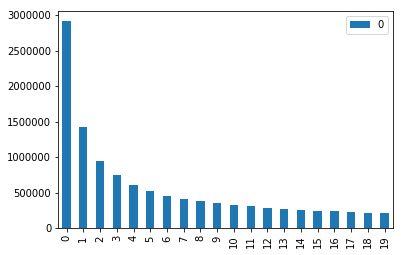

In [43]:
import pandas
%matplotlib inline  
df = pandas.DataFrame.from_dict(token_count, orient='index')
df.plot(kind='bar')

In [44]:
stats[0].most_common(50000)

[('the', 74724406),
 (',', 51987242),
 ('.', 40378937),
 ('a', 33996048),
 ('of', 33832565),
 ('to', 25506226),
 ('and', 19842613),
 ('in', 15756314),
 ('is', 15301629),
 ('be', 10015182),
 (')', 9806508),
 ('(', 9607377),
 ('for', 9580157),
 ('or', 9493019),
 ('The', 8458032),
 ('may', 8036735),
 ('an', 7878658),
 ('that', 7260270),
 ('data', 7237294),
 ('as', 6655915),
 ('by', 6208632),
 ('with', 6060110),
 ('on', 4885875),
 ('one', 4869901),
 ('are', 4792411),
 ('from', 4556377),
 ('system', 4468868),
 ('information', 4362628),
 ('FIG', 4235693),
 ('In', 4100799),
 ('user', 4085107),
 ('can', 4029110),
 ('device', 3827365),
 ('at', 3708279),
 (';', 3474385),
 ('which', 3466240),
 ('example', 3229340),
 ('first', 2801313),
 ('such', 2704760),
 ('not', 2608166),
 ('image', 2582367),
 ('other', 2486439),
 ('method', 2449915),
 ('more', 2445777),
 ('embodiment', 2356765),
 ('1', 2326012),
 ('”', 2309627),
 ('“', 2299666),
 ('each', 2292827),
 ('invention', 2279401),
 ('second', 2139403)

In [45]:
normalised_unfiltered_count = stats[0]
total = sum(normalised_unfiltered_count.values())
for key in normalised_unfiltered_count:
    normalised_unfiltered_count[key] /= total

In [46]:
normalised_unfiltered_count.most_common(50)

[('the', 0.06770957855537918),
 (',', 0.04710688829131017),
 ('.', 0.03658832439275873),
 ('a', 0.030804635404240496),
 ('of', 0.030656499532394705),
 ('to', 0.023111803832850202),
 ('and', 0.017979868099152075),
 ('in', 0.014277174455240509),
 ('is', 0.013865173458866545),
 ('be', 0.00907499689425995),
 (')', 0.008885912372190075),
 ('(', 0.00870547499156625),
 ('for', 0.008680810295960944),
 ('or', 0.008601852461807552),
 ('The', 0.00766402588905037),
 ('may', 0.007282278561187429),
 ('an', 0.007139041195750242),
 ('that', 0.006578704980247855),
 ('data', 0.006557885874949269),
 ('as', 0.006031084403005179),
 ('by', 0.005625790536567677),
 ('with', 0.005491211186064683),
 ('on', 0.00442720865689134),
 ('one', 0.004412734231924434),
 ('are', 0.0043425186822383475),
 ('from', 0.004128642607201493),
 ('system', 0.004049348601039669),
 ('information', 0.003953081986009989),
 ('FIG', 0.003838063134552982),
 ('In', 0.003715832442084857),
 ('user', 0.003701613544089321),
 ('can', 0.00365087

In [47]:
sum([c for i, c in normalised_unfiltered_count.most_common(50)])

0.4636267613578342

In [48]:
sum([c for i, c in normalised_unfiltered_count.most_common(100)])

0.5352775688910233

In [49]:
sum([c for i, c in normalised_unfiltered_count.most_common(1000)])

0.7872669079795737

In [50]:
sum([c for i, c in normalised_unfiltered_count.most_common(10000)])

0.9568580340171657

In [51]:
sum([c for i, c in normalised_unfiltered_count.most_common(100000)])

0.990258006126752

In [52]:
# Looking at length of longest string
max([len(token) for token, _ in stats[0].most_common(10000)])

22

In [53]:
# Looking at length of longest string
max([len(token) for token, _ in stats[0].most_common(100000)])

74

In [54]:
# Looking at length of longest string
max([len(token) for token, _ in stats[0].most_common(1000000)])

145

In [55]:
# Looking at length of longest string
max([len(token) for token, _ in stats[0].items()])

428

In [56]:
# dict comprehension reminder - d = {key: value for (key, value) in iterable}
terms_ignore = ["_CAPITAL_", "_ALL_CAPITAL_"]
for i in [50, 100, 250, 500, 1000, 2000, 3000, 4000, 5000, 10000, 50000, 100000, 200000, 300000]:
    term_lengths = {len(term): term for term, _ in stats[0].most_common(i) if term not in terms_ignore}
    print("Our longest unfiltered token for top {0} tokens is {1} with a length of {2}".format(i, term_lengths[max(term_lengths.keys())], max(term_lengths.keys())))

Our longest filtered token for top 50 tokens is information with a length of 11
Our longest filtered token for top 100 tokens is embodiments with a length of 11
Our longest filtered token for top 250 tokens is configuration with a length of 13
Our longest filtered token for top 500 tokens is communications with a length of 14
Our longest filtered token for top 1000 tokens is computer-readable with a length of 17
Our longest filtered token for top 2000 tokens is three-dimensional with a length of 17
Our longest filtered token for top 3000 tokens is computer-implemented with a length of 20
Our longest filtered token for top 4000 tokens is computer-implemented with a length of 20
Our longest filtered token for top 5000 tokens is computer-implemented with a length of 20
Our longest filtered token for top 10000 tokens is transmission/reception with a length of 22
Our longest filtered token for top 50000 tokens is -2-oxo-1,2-dihydro-1,5-naphthyridine-3-carboxamide with a length of 50
Our lon

In [57]:
stats[0].most_common()[:-3000-1:-1]

[('Enum.h', 9.061240119510508e-10),
 ('cross-referencers', 9.061240119510508e-10),
 ('vertically-contiguous', 9.061240119510508e-10),
 ('touch-movement', 9.061240119510508e-10),
 ('reach-able', 9.061240119510508e-10),
 ('www.blueice.com/bpwin.htm', 9.061240119510508e-10),
 ('NM_003047', 9.061240119510508e-10),
 ('coach/recruiter', 9.061240119510508e-10),
 ('60/349787', 9.061240119510508e-10),
 ('blocking/accepting', 9.061240119510508e-10),
 ('=∫0TYu', 9.061240119510508e-10),
 ('C4AB1FEA-D0DD-44FD-96CB-41B41B5F718A', 9.061240119510508e-10),
 ('ScopeTaskLinkRelationship', 9.061240119510508e-10),
 ('flash\\swf\\data\\time.js', 9.061240119510508e-10),
 ('yY1C', 9.061240119510508e-10),
 ('walk-mans', 9.061240119510508e-10),
 ('on-EIW', 9.061240119510508e-10),
 ('Dword—see', 9.061240119510508e-10),
 ('Task/', 9.061240119510508e-10),
 ('5/C5.0', 9.061240119510508e-10),
 ('v0=0.9c', 9.061240119510508e-10),
 ('DYNAMICPROPERTIES', 9.061240119510508e-10),
 ('transaction_volume_adjustment_value', 

In [62]:
from patentdata.models.lib.utils import (
    punctuation_split
    )
tokens = [term for term, _ in stats[0].most_common()[:-100-1:-1]]
print(punctuation_split(tokens))

['Enum', '.', 'h', 'cross', '-', 'referencers', 'vertically', '-', 'contiguous', 'touch', '-', 'movement', 'reach', '-', 'able', 'www', '.', 'blueice', '.', 'com', '/', 'bpwin', '.', 'htm', 'NM_003047', 'coach', '/', 'recruiter', '60', '/', '349787', 'blocking', '/', 'accepting', '', '=', '', '∫', '0TYu', 'C4AB1FEA', '-', 'D0DD', '-', '44FD', '-', '96CB', '-', '41B41B5F718A', 'ScopeTaskLinkRelationship', 'flash', '\\', 'swf', '\\', 'data', '\\', 'time', '.', 'js', 'yY1C', 'walk', '-', 'mans', 'on', '-', 'EIW', 'Dword', '—', 'see', 'Task', '/', '', '5', '/', 'C5', '.', '0', 'v0', '=', '0', '.', '9c', 'DYNAMICPROPERTIES', 'transaction_volume_adjustment_value', 'predsatisifed', 'devices', '-', 'e', '.', 'g', '.', '', '', '=', 'Σkvk', 'uchar', '*', 'challengeLen', 'crossover', '-', 'faulted', 'input', '/', 'output', '/', 'both', 'encrypted', '/', 'tethered', '', '*', '', '.', 'X', '.', 'COM', 'L67R', 'PCT', '/', 'JP2010', '/', '070319', 'registry', '*', '', '*', '', '/', '', 'System', '.',

Words are not split on \_. It may be better to use [^a-zA-Z0-9] instead of "\W" (which is equal to [^a-zA-Z0-9\_]).

In [63]:
import re

In [64]:
def punctuation_split(tokens):
    """ Split hyphenated and slashed tokens into words. """
    return sum((re.split('([^a-zA-Z0-9])', token) for token in tokens), list())

In [65]:
print(punctuation_split(tokens))

['Enum', '.', 'h', 'cross', '-', 'referencers', 'vertically', '-', 'contiguous', 'touch', '-', 'movement', 'reach', '-', 'able', 'www', '.', 'blueice', '.', 'com', '/', 'bpwin', '.', 'htm', 'NM', '_', '003047', 'coach', '/', 'recruiter', '60', '/', '349787', 'blocking', '/', 'accepting', '', '=', '', '∫', '0TYu', 'C4AB1FEA', '-', 'D0DD', '-', '44FD', '-', '96CB', '-', '41B41B5F718A', 'ScopeTaskLinkRelationship', 'flash', '\\', 'swf', '\\', 'data', '\\', 'time', '.', 'js', 'yY1C', 'walk', '-', 'mans', 'on', '-', 'EIW', 'Dword', '—', 'see', 'Task', '/', '', '5', '/', 'C5', '.', '0', 'v0', '=', '0', '.', '9c', 'DYNAMICPROPERTIES', 'transaction', '_', 'volume', '_', 'adjustment', '_', 'value', 'predsatisifed', 'devices', '-', 'e', '.', 'g', '.', '', '', '=', '', 'Σ', 'kvk', 'uchar', '*', 'challengeLen', 'crossover', '-', 'faulted', 'input', '/', 'output', '/', 'both', 'encrypted', '/', 'tethered', '', '*', '', '.', 'X', '.', 'COM', 'L67R', 'PCT', '/', 'JP2010', '/', '070319', 'registry', '

Finally, we just need to deal with the large concatenated words such as 'ScopeTaskLinkRelationship' or 'businesstransactiondocumentitemhierarchyrelationshiptypecod'.  

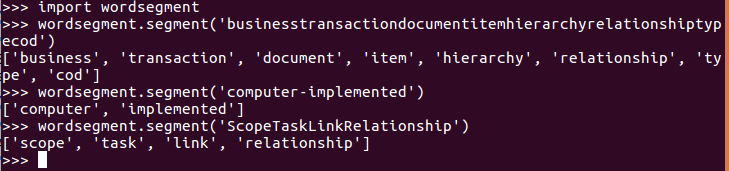

How do we decide when to run this word segmentation? Based on word length and absence from a dictionary of common words?

We can use enchant - a dictionary for Python:

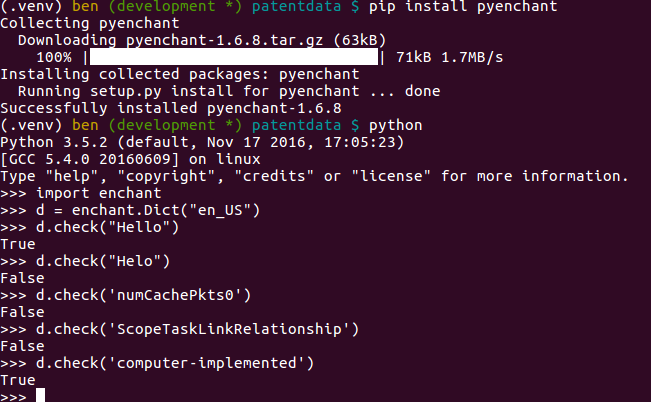

In [ ]:
import math
[(term, math.ceil(i*total)) for term, i in stats[0].most_common()[:-1000-1:-1]]

In [ ]:
total

In [ ]:
import string
len(string.punctuation)

In [ ]:
string.punctuation

What is our longest token?

---
## Looking at Paragraph and Sentence Lengths

This should give us an idea of our sequence length distributions.  

In [ ]:
stats[3].most_common(100)

In [ ]:
df_num_paras = pd.DataFrame.from_dict(stats[3], orient='index')

In [ ]:
df_num_paras[0:100]

In [ ]:
df_num_paras[0:300].plot(kind="bar")

It would be nice if we could:  
1) Limit by a range e.g. 0 to 500  
2) Bin the data in groups of 10  

Could we just not do this manually? (Considering the time it takes to look up a simple solution in pandas...)

In [ ]:
bin_range = np.arange(0, 501, 10)
bin_range

In [ ]:
binned = pd.cut([no_paras for no_paras, count in stats[3].items()],bin_range)

In [ ]:
type(list(stats[3].keys())[5])

In [ ]:
binned.categories

In [ ]:
import pandas
%matplotlib inline
# Looking at number of paragraphs per document
df_num_paras = pandas.DataFrame(stats[3].most_common())

In [ ]:
df_num_paras.sort_values(0, inplace=True)

In [ ]:
df_num_paras

In [ ]:
val, weight = zip(*[(k, v) for k,v in stats[3].items()])

In [ ]:
df_num_paras[0:500].plot(kind="hist", bins=100)

In [ ]:
# Bin the data frame by "a" with 10 bins...
bins = np.linspace(df_num_paras[0].min(), df_num_paras[0].max(), 100)
groups = df_num_paras.groupby(pandas.cut(df_num_paras[0], bins))

In [ ]:
bins

In [ ]:
weight

In [ ]:
df_num_paras[20:80]

Peak is about 50 paragraphs.

In [ ]:
df_num_sentences = pd.DataFrame.from_dict(stats[4], orient='index')
df_num_sentences.sort_index(inplace=True)
df_num_sentences[30:500].plot(kind="bar")

Peak of distribution is around 200 sentences per publication.

In [ ]:
# Issue that our index is not continuous!
stats[4].most_common()

In [ ]:
# Create models from data
def best_fit_distribution(data, bins=200):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

In [ ]:
def make_pdf(dist, params, size=10000):
    """Generate distributions's Propbability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

In [ ]:
# Load data from statsmodels datasets
data = df_num_paras

# Find best fit distribution
best_fit_name, best_fir_paramms = best_fit_distribution(data, 200)
best_dist = getattr(st, best_fit_name)

In [ ]:
best_fit_name

In [ ]:
best_fir_paramms

In [ ]:
# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

# Make PDF
pdf = make_pdf(best_dist, best_fir_paramms)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fir_paramms)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')

---
### Sentence length distribution

In [ ]:
stats[5].most_common(100)

In [ ]:
df_sent_len = pd.DataFrame.from_dict(stats[5], orient='index')

In [ ]:
df_sent_len[6:100].plot(kind="bar")

I think we've now fixed the early part of this distribution by sorting adding custom abbreviations to the sentence segmentation algorithm.  

We see an average sentence length of around 20 words, with a longish tail. Most fall within 10 - 50.

In [ ]:
# This doesn't work as the final array is too big!
actual_data = list()
for sent_l, count in stats[5].items():
    actual_data += [sent_l] * count

In [ ]:
len(actual_data)

In [ ]:
max(actual_data)